In [172]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [173]:
file = r'C:\\Users\palux\Desktop\df s\Econimetrix\Econometrix_1.csv'
df = pd.read_csv(file, encoding='cp1251', sep = ';')

In [174]:
del df['№ п/п']

In [175]:
df.isna().sum()

Субъект РФ    0
Y             0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
dtype: int64

In [176]:
df = df.rename({'Субъект РФ' : 'region'}, axis = 1)

In [177]:
df = df.replace({',': '.'}, regex=True)

In [178]:
df

,region,Y,x1,x2,x3,x4,x5,x6,x7
0,Белгородская область,18800,106.8,397069.9,134620,797428,40383,4959,698.1
1,Брянская область,15348,111.7,144264,33192,431052,29219,5128,561.2
2,Владимирская область,14312,108.2,218712.3,24181,506112,38648,5983,704.2
3,Воронежская область,15871,108.3,328770.8,101470,1019463,35134,5662,1054.9
4,Ивановская область,13006,117.1,98209,13102,564135,33088,5738,491
5,Калужская область,17557,125.6,184580.5,24625,513811,49924,5412,480.1
6,Костромская область,14823,107.9,92291.4,15264,312406,31840,5962,315
7,Курская область,16387,105.3,192442.2,56531,494722,27909,5180,579.7
8,Липецкая область,16811,104.2,254738.1,47418,717970,37429,5356,544.5
9,Московская область,25605,110.6,1796535.6,100414,5012245,69119,6801,2911.3


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  40 non-null     object
 1   Y       40 non-null     int64 
 2   x1      40 non-null     object
 3   x2      40 non-null     object
 4   x3      40 non-null     object
 5   x4      40 non-null     int64 
 6   x5      40 non-null     int64 
 7   x6      40 non-null     int64 
 8   x7      40 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.9+ KB


In [180]:
for col in ["Y", "x1", "x2", "x3", "x4", "x5", "x6", "x7"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [181]:
df = df.drop('region', axis = 1)

In [182]:
df.isna().sum()

Y     0
x1    0
x2    0
x3    1
x4    0
x5    0
x6    0
x7    0
dtype: int64

In [183]:
x3_mediana = df['x3'].median()

df['x3'] = df['x3'].fillna(value=x3_mediana)

In [184]:
df.isna().sum()

Y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

In [185]:
df[['Y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].corr()

,Y,x1,x2,x3,x4,x5,x6,x7
Y,1.000000,-0.006997,0.690217,0.155028,0.713415,0.772591,0.637427,0.563259
x1,-0.006997,1.000000,0.094805,0.058167,0.068369,0.108893,-0.393492,0.137021
x2,0.690217,0.094805,1.000000,0.491972,0.967179,0.801872,0.243146,0.939516
x3,0.155028,0.058167,0.491972,1.000000,0.488371,0.115093,-0.161409,0.679041
x4,0.713415,0.068369,0.967179,0.488371,1.000000,0.782781,0.349550,0.920081
x5,0.772591,0.108893,0.801872,0.115093,0.782781,1.000000,0.497027,0.665858
x6,0.637427,-0.393492,0.243146,-0.161409,0.349550,0.497027,1.000000,0.143700
x7,0.563259,0.137021,0.939516,0.679041,0.920081,0.665858,0.143700,1.000000


In [186]:
# preparation of independent variables(X) and dependent variable (y)

X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = df['Y']

In [187]:
X = sm.add_constant(X)

In [188]:
# Проверка на NaN и inf в данных
print(X.isna().sum())  # Проверка на NaN
print((X == float('inf')).sum())  # Проверка на inf

const    0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
dtype: int64
const    0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
dtype: int64


In [189]:
model = sm.OLS(y,X)

In [190]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     14.88
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.85e-08
Time:                        15:41:12   Log-Likelihood:                -355.91
No. Observations:                  40   AIC:                             727.8
Df Residuals:                      32   BIC:                             741.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8360.4187   6959.146     -1.201      0.2

In [191]:
from scipy.stats import pearsonr

# Проверка значимости корреляции между Y и остальными переменными
n = len(df)  # Количество наблюдений

significance_results = {}

for col in ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]:
    r, p_value = pearsonr(df["Y"], df[col])
    significance_results[col] = {"correlation": r, "p-value": p_value}

# Вывод результатов
for key, value in significance_results.items():
    print(f"{key}: correlation = {value['correlation']:.2f}, p-value = {value['p-value']:.5f}")


x1: correlation = -0.01, p-value = 0.96582
x2: correlation = 0.69, p-value = 0.00000
x3: correlation = 0.16, p-value = 0.33949
x4: correlation = 0.71, p-value = 0.00000
x5: correlation = 0.77, p-value = 0.00000
x6: correlation = 0.64, p-value = 0.00001
x7: correlation = 0.56, p-value = 0.00015


Проверка мультиколлинеарности

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Расчёт VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Variable         VIF
0    const  494.680481
1       x1    1.597429
2       x2   38.538548
3       x3    3.322518
4       x4   23.434718
5       x5    5.858137
6       x6    3.035852
7       x7   19.462415


График остатков

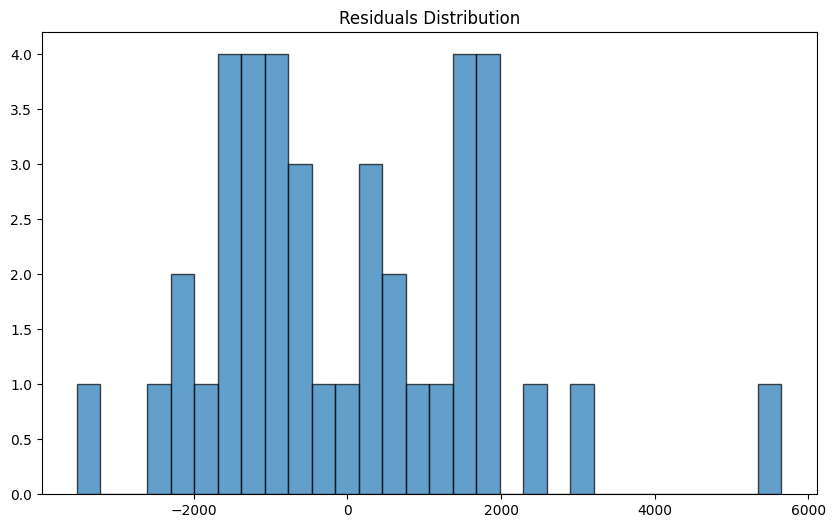

In [193]:
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor="k", alpha=0.7)
plt.title("Residuals Distribution")
plt.show()

Тест на нормальность остатков

In [194]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: W={stat:.3f}, p-value={p:.5f}")

Shapiro-Wilk test: W=0.958, p-value=0.14863


Тест на автокорреляцию (Durbin-Watson)

In [195]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.3f}")

Durbin-Watson statistic: 2.485


Значение близкое к 2 указывает на отсутствие автокорреляции

In [196]:
# Делаем прогноз
predictions = results.predict(X)

# Добавляем прогнозы в исходный DataFrame
df["Predicted_Y"] = predictions
print(df[["Y", "Predicted_Y"]].head())

       Y   Predicted_Y
0  18800  16859.840676
1  15348  13725.531715
2  14312  15834.491554
3  15871  15679.278373
4  13006  15123.254180


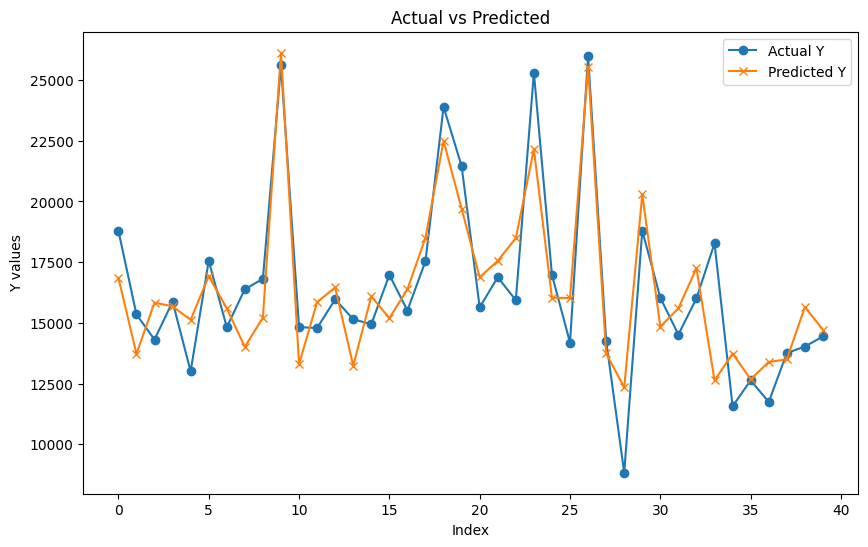

In [197]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Y"], label="Actual Y", marker="o")
plt.plot(df.index, df["Predicted_Y"], label="Predicted Y", marker="x")
plt.title("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Y values")
plt.legend()
plt.show()


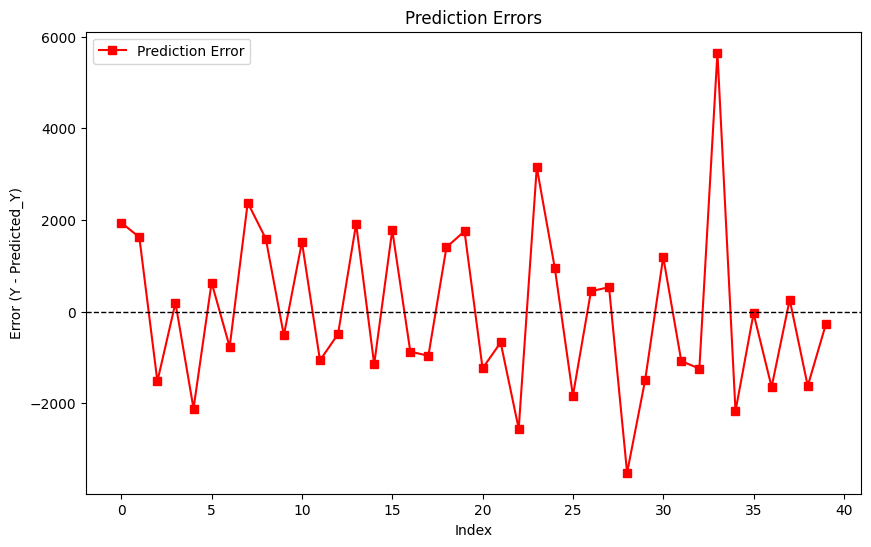

In [198]:
# Вычисляем ошибки
errors = df["Y"] - df["Predicted_Y"]

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.plot(df.index, errors, label="Prediction Error", marker="s", color="red")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Prediction Errors")
plt.xlabel("Index")
plt.ylabel("Error (Y - Predicted_Y)")
plt.legend()
plt.show()


Проверка мультиколлинеарности (VIF)

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Расчёт мультиколлинирности VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable         VIF
0    const  494.680481
1       x1    1.597429
2       x2   38.538548
3       x3    3.322518
4       x4   23.434718
5       x5    5.858137
6       x6    3.035852
7       x7   19.462415


VIF > 10: Высокая мультиколлинеарность.

In [200]:
df.isna().sum()

Y              0
x1             0
x2             0
x3             0
x4             0
x5             0
x6             0
x7             0
Predicted_Y    0
dtype: int64

In [203]:
# Добавляем квадрат одной из переменных
df["x1_squared"] = df["x1"] ** 2
X = sm.add_constant(df[["x1", "x1_squared", "x2", "x3", "x4", "x5", "x6", "x7"]])

# Пересчитываем модель
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.85e-08
Time:                        15:41:40   Log-Likelihood:                -355.56
No. Observations:                  40   AIC:                             729.1
Df Residuals:                      31   BIC:                             744.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.564e+04   3.77e+04     -0.946      0.3

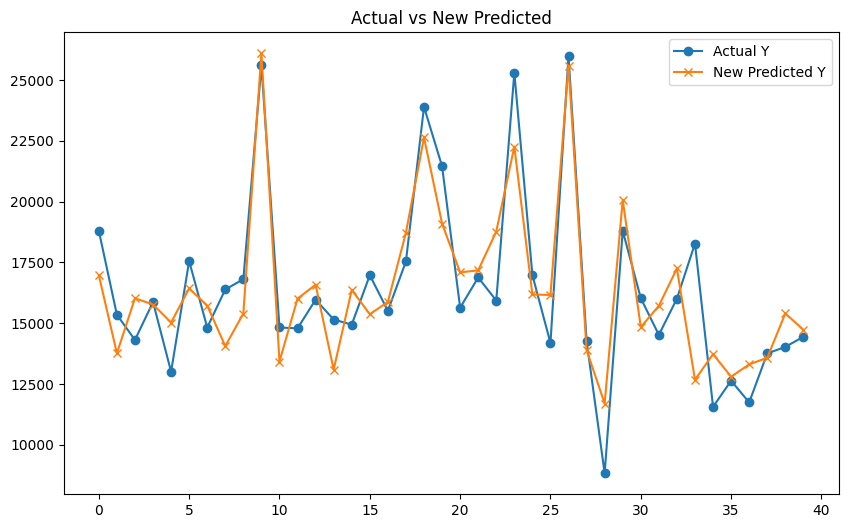

In [206]:
# Новый прогноз
predictions = model.predict(X)
df["New_Predicted_Y"] = predictions

# Сравнение реальных и новых предсказанных значений
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label="Actual Y", marker="o")
plt.plot(df.index, df["New_Predicted_Y"], label="New Predicted Y", marker="x")
plt.title("Actual vs New Predicted")
plt.legend()
plt.show()

In [208]:
# Остатки модели
residuals = y - df["Predicted_y"]

# График остатков
plt.figure(figsize=(10, 6))
plt.scatter(df["Predicted_y"], residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

KeyError: 'Predicted_y'